In [25]:
import argparse
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
import os
from google.oauth2 import service_account
import json
import pandas as pd
import time
from functools import reduce
import matplotlib.pyplot as plt

In [2]:
cred_file_loc = r'C:\Users\kiribyro\Desktop\NN_and_AI\Assign3\Mynewproject-2fc06b8eefc6.json'

In [3]:
cred = service_account.Credentials.from_service_account_file(cred_file_loc)

In [4]:
Client = language.LanguageServiceClient(credentials=cred)

In [9]:
with open('clean-data.json') as f:
    json_1 = json.load(f)
dict_1 = dict(json_1)
df_1 = pd.DataFrame.from_dict(dict_1)
df_1.head()

,text,sentiment
0,"Thank you, Ellen. We have a strong 2018, with ...",positive
1,Stock-based compensation totaled $2.3 billion....,positive
10,"For the full-year 2018, Other Bets revenues we...",negative
100,Great. Thank you. I just wanted to follow up o...,neutral
1000,"Sure. So again, just to sort of be clear with ...",neutral


In [10]:
final_df = df_1.reset_index()

In [11]:
final_df = final_df.drop('index',axis=1)

In [12]:
x = final_df['text']

In [13]:
cleaned_text = [w.lower() for w in x] #converting all text to lowercase

In [14]:
results = []
for paragrph in cleaned_text:

    document = types.Document(content=paragrph, type=enums.Document.Type.PLAIN_TEXT)
    result =Client.analyze_sentiment(document=document)
    
    results.append(result)

In [15]:
score_store = []
for i in results:
    score = i.document_sentiment.score
    score_store.append(score)

In [16]:
magnitude_store = []
for i in results:
    magnitude = i.document_sentiment.magnitude
    magnitude_store.append(magnitude)

In [18]:
results[0]

document_sentiment {
  magnitude: 0.20000000298023224
}
language: "en"
sentences {
  text {
    content: "thank you, ellen."
    begin_offset: -1
  }
  sentiment {
    magnitude: 0.20000000298023224
    score: 0.20000000298023224
  }
}
sentences {
  text {
    content: "we have a strong 2018, with total revenues of $136.8 billion, up 23% over 2017, reflecting the benefit of our ongoing investments to deliver exceptional experiences for users and compelling returns for our advertisers, partners and enterprise customers."
    begin_offset: -1
  }
  sentiment {
  }
}

In [19]:
df_1['magnitude'] = magnitude_store

In [21]:
df_1['score'] = score_store

In [23]:
df_1.to_csv('Google_API_Results.csv')

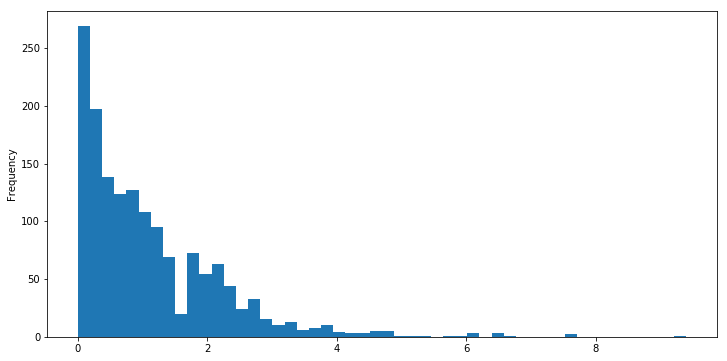

In [28]:
df_1['magnitude'].plot(kind='hist',bins=50, figsize=(12,6))
plt.show()

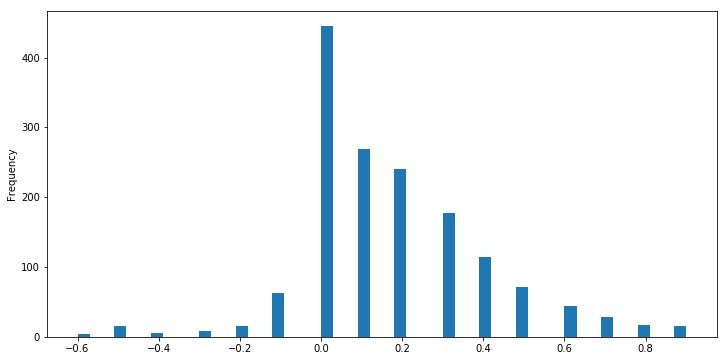

In [27]:
df_1['score'].plot(kind='hist',bins=50, figsize=(12,6))
plt.show()

In [99]:
def Average(lst): 
    return reduce(lambda a, b: a + b, lst) / len(lst)

In [103]:
overall_socre = Average(score_store) 
print("Overall sentiment score of all the documents =", round(overall_socre, 2))

Overall sentiment score of all the documents = 0.17


In [104]:
overall_magnitude = Average(magnitude_store) 
print("Overall Magnitude of all the documents is =", round(overall_magnitude, 2))

Overall Magnitude of all the documents is = 1.1
